In [2]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

c:\users\accessible ai\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


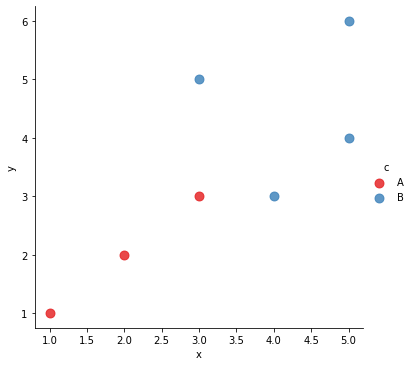

In [19]:
data = pd.read_csv("knn.csv")
sns.lmplot('x', 'y', data=data,
           hue='c', 
           palette='Set1',           
           fit_reg=False,
           scatter_kws={"s":80})
plt.show()

In [8]:
data.head()

,x,y,c
0,1,1,A
1,2,2,A
2,4,3,B
3,3,3,A
4,3,5,B


In [4]:
def euclidean_distance(pt1, pt2, dimension):
    distance = 0    
    for x in range(dimension):
        distance += np.square(pt1[x] - pt2[x])    
    return np.sqrt(distance)

In [5]:
#---our own KNN model---

def knn(training_points, test_point, k):
    distances = {}  
    
    #---the number of axes we are dealing with---    
    dimension = test_point.shape[1]   
    
    #--calculating euclidean distance between each    
    # point in the training data and test data    
    for i in range(len(training_points)):        
        dist = euclidean_distance(test_point, training_points.iloc[i],                                   
                                  dimension)     
        
        #---record the distance for each training point---        
        distances[i] = dist[0]    
        
    #---sort the distances---    
    sorted_d = sorted(distances, key=distances.get)    
    
    #---to store the neighbors---    
    neighbors = []  
    
    #---extract the top k neighbors---    
    for i in range(k):        
        neighbors.append(sorted_d[i])   
        
        #---for each neighbor found, find out its class---    
        class_counter = {}    
        for x in range(len(neighbors)):        
            
            #---find out the class for that particular point---        
            cls = training_points.iloc[neighbors[x]][-1]
            
            if cls in class_counter:            
                class_counter[cls] += 1        
            else:            
                class_counter[cls] = 1
    #---sort the class_counter in descending order---    
    sorted_counter = sorted(class_counter, key=class_counter.get, reverse=True)    
    
    #---return the class with the most count, as well as the neighbors found---    
    
    return(sorted_counter[0][0], neighbors)

In [7]:
#---test point---
test_set = [[3,3.9]]
test = pd.DataFrame(test_set)
cls,neighbors = knn(data, test, 5)
print("Predicted Class: " + cls)
print(neighbors)

Predicted Class: B
[3, 4, 2, 6, 1]


   x    y  c
0  1  1.0  A
1  2  2.0  A
2  4  3.0  B
3  3  3.0  A
4  3  5.0  B
5  5  6.0  B
6  5  4.0  B
0  3  3.9  B
0  3  3.9  B
0  3  3.9  B


c:\users\accessible ai\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


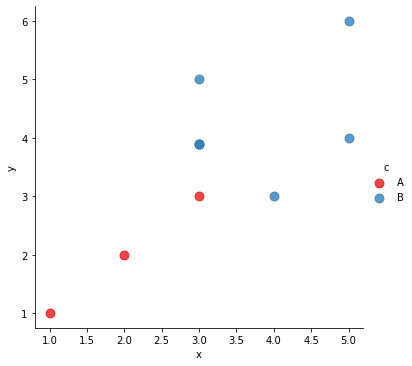

In [23]:

entry = pd.DataFrame([[3,3.9,'B']], columns=list('xyc'))
data = data.append(entry)
print(data)
sns.lmplot('x', 'y', data=data,
           hue='c', 
           palette='Set1',           
           fit_reg=False,
           scatter_kws={"s":80})
plt.show()

In [24]:
from sklearn import datasets

iris = datasets.load_iris()

In [25]:
print(iris.DESCR)
print(iris.feature_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

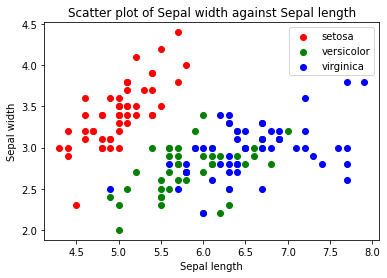

In [26]:
X = iris.data[:, :2] # take the first two features
y = iris.target

colors = ['r', 'g', 'b']

for color, i, target in zip(colors, [0, 1, 2], iris.target_names):    
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier

k=3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

predictions = knn.predict(X)

print(np.unique(predictions, return_counts=True))


(array([0, 1, 2]), array([50, 44, 56], dtype=int64))


In [28]:
print(np.unique(y, return_counts=True))

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.82      0.72      0.77        50
           2       0.75      0.84      0.79        50

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150



In [ ]:
# Overfitting and Cross-validation

In [30]:
from sklearn.model_selection import cross_val_score


#---holds the cv (cross-validates) scores---\
cv_scores = []

#---use all features---
X = iris.data[:, :4]
y = iris.target

#---number of divisions---
divs = 10

#---creating list of K for KNN---

ks = list(range(1,int(len(X) * ((divs - 1)/divs))))

#---remove all multiples of 3---

ks = [k for k in ks if k % 3 != 0]

#---perform cross validation---

for k in ks:    
    knn = KNeighborsClassifier(n_neighbors=k)    
    
    #---performs cross-validation and returns the average accuracy---    
    scores = cross_val_score(knn, X, y, cv=divs, scoring='accuracy')    
    mean = scores.mean()    
    cv_scores.append(mean)    
    print(k, mean)

1 0.96
2 0.9533333333333334
4 0.9666666666666666
5 0.9666666666666668
7 0.9666666666666668
8 0.9666666666666668
10 0.9666666666666668
11 0.9666666666666668
13 0.9800000000000001
14 0.9733333333333334
16 0.9733333333333334
17 0.9733333333333334
19 0.9733333333333334
20 0.9800000000000001
22 0.9666666666666666
23 0.9733333333333334
25 0.9666666666666666
26 0.96
28 0.9533333333333334
29 0.9533333333333334
31 0.9466666666666667
32 0.9466666666666667
34 0.9466666666666667
35 0.9466666666666667
37 0.9466666666666667
38 0.9466666666666667
40 0.9533333333333334
41 0.9533333333333334
43 0.9466666666666667
44 0.9400000000000001
46 0.9333333333333333
47 0.9333333333333333
49 0.9400000000000001
50 0.9266666666666667
52 0.9333333333333333
53 0.9333333333333333
55 0.9333333333333333
56 0.9066666666666666
58 0.9133333333333334
59 0.9200000000000002
61 0.9199999999999999
62 0.9066666666666666
64 0.9
65 0.9
67 0.8866666666666667
68 0.8800000000000001
70 0.8866666666666667
71 0.8866666666666667
73 0.893

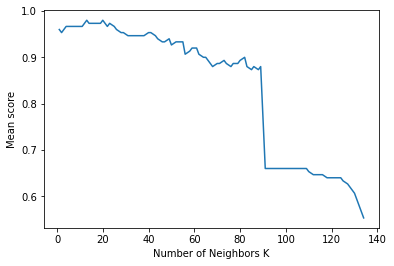

In [31]:
plt.plot(ks, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean score')
plt.show()

In [32]:
best_k = ks[cv_scores.index(max(cv_scores))]
print(best_k)

13
